In [22]:
import numpy as np
from skimage.io import imread,imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

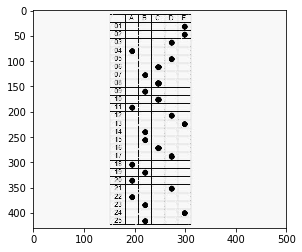

<Figure size 2592x432 with 0 Axes>

In [23]:
image = rgb2gray(imread('main.jpg'))
plt.imshow(image, cmap='gray')
#plt.colorbar()
plt.figure(figsize = (36,6))
plt.show()

In [24]:
print(image.max())
print(image.min())
print(image.mean())
print(image.std())

0.9921568627450981
0.0
0.9139526128572731
0.19694465940347367


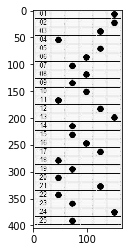

In [25]:
plt.imshow(image[25:,149:314], cmap = 'gray')

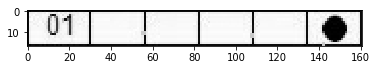

In [26]:
lines = image[24:,152:313]
plt.imshow(lines[:17,:], cmap = 'gray')

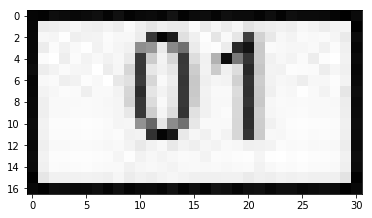

In [27]:
lines = image[24:,152:313]
plt.imshow(lines[:17,:31], cmap = 'gray')

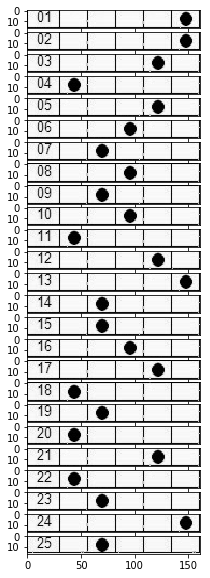

In [28]:
dims = image.shape

fig, ax = plt.subplots(25, 1, figsize = (25, 10), sharex = True)
count = 0;
for position in range(25):
    ax[position].imshow(lines[count:count + 17, :], cmap = 'gray')
    count += 16 #Tamanho de cada linhas(retângulo)
    

In [40]:
dims = image.shape

def respostaMarcada(resp):
    alts = {
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'E',
    }
    for k, x in enumerate(resp):
        letra = x.index(min(x))
        print(k + 1, alts[letra])


def options():
    #fig, ax = plt.subplots(1, 5, figsize = (25, 10), sharex = True)
    count = 0;
    count2 = 30

    resp = []
    
    for __ in range(25):
        
        linha = lines[count: count + 17, :]
        opts = []
        
        for posix in range(5):
            data = linha[:, count2: count2 + 30]
            #plt.imshow(data, cmap ='gray')
            opts.append(data.sum())
            #ax[posix].imshow(data, cmap = 'gray')
            count2 += 26
        resp.append(opts)
        count2 = 30
        count += 16
        
    respostaMarcada(resp)

options()

1 E
2 E
3 D
4 A
5 D
6 C
7 B
8 C
9 B
10 C
11 A
12 D
13 E
14 B
15 B
16 C
17 D
18 A
19 B
20 A
21 D
22 A
23 B
24 E
25 B
